In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
sns.set()

In [3]:
df = pd.read_csv('2013_movies.csv')
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [4]:
def series_to_datetime(s):
    return [datetime.strptime(x,'%Y-%m-%d %H:%M:%S') for x in s]

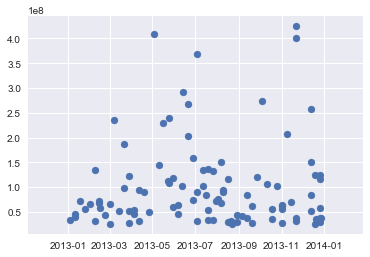

In [5]:
plt.scatter(series_to_datetime(df.ReleaseDate), df.DomesticTotalGross);

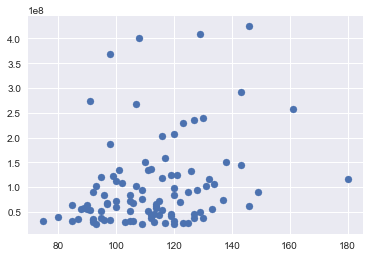

In [6]:
plt.scatter(df.Runtime, df.DomesticTotalGross);

In [7]:
df.groupby(['Rating']).mean()[['Runtime', 'DomesticTotalGross']].head()

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


In [8]:
G = df[df.Rating == 'G']
PG = df[df.Rating == 'PG']
PG13 = df[df.Rating == 'PG-13']
R = df[df.Rating == 'R']

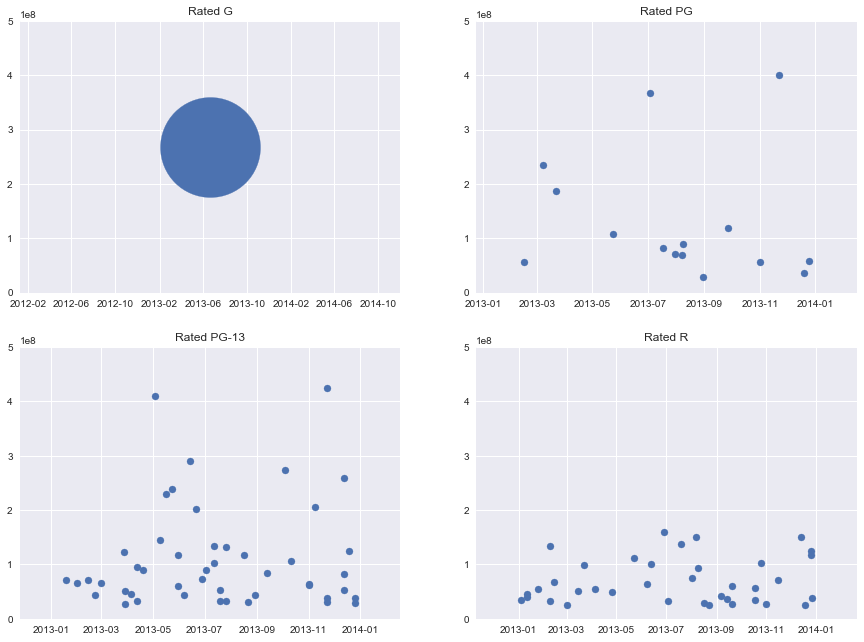

In [9]:
fig, ax = plt.subplots(2, 2,figsize=(15,11))
ax[0, 0].scatter(series_to_datetime(G.ReleaseDate), G.DomesticTotalGross, s=10000)
ax[0, 0].set_title('Rated G')
ax[0, 1].scatter(series_to_datetime(PG.ReleaseDate), PG.DomesticTotalGross)
ax[0, 1].set_title('Rated PG')
ax[1, 0].scatter(series_to_datetime(PG13.ReleaseDate), PG13.DomesticTotalGross)
ax[1, 0].set_title('Rated PG-13')
ax[1, 1].scatter(series_to_datetime(R.ReleaseDate), R.DomesticTotalGross)
ax[1, 1].set_title('Rated R')
plt.setp(ax, yticks=[i * 10**8 for i in range(6)]);

In [10]:
df.groupby(['Director']).mean()[['DomesticTotalGross']].sort_values('DomesticTotalGross', ascending=False).head()

,DomesticTotalGross
Director,
Francis Lawrence,424668047.0
Shane Black,409013994.0
Chris BuckJennifer Lee,400738009.0
Pierre CoffinChris Renaud,368061265.0
Zack Snyder,291045518.0


In [11]:
def month_from_timestamp(s):
    return datetime.strptime(s, '%Y-%m-%d %H:%M:%S').month

In [12]:
df['Month'] = df['ReleaseDate'].apply(month_from_timestamp)

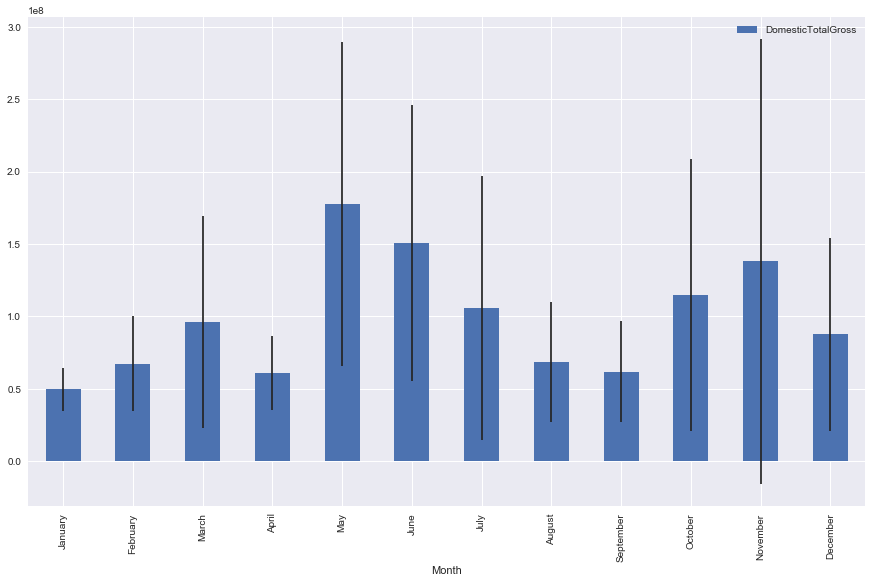

In [13]:
months = ['January', 
          'February', 
          'March', 
          'April', 
          'May', 
          'June', 
          'July', 
          'August', 
          'September', 
          'October', 
          'November', 
          'December']
gb = df.groupby('Month')[['DomesticTotalGross']]
means = gb.mean()
stds = gb.std()
ax = means.plot(kind='bar',yerr=stds, figsize=(15, 9))
ax.set_xticklabels(months);